In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 303s 26us/step


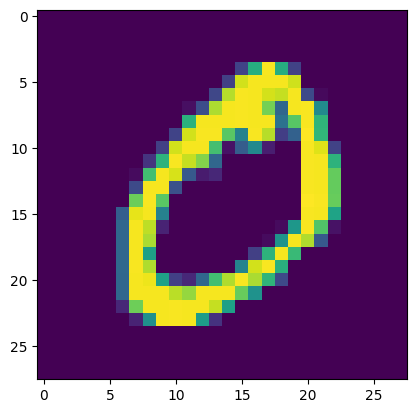

In [12]:
# i want show one image
plt.imshow(X_train[1])

In [13]:
# to bring all rows data between 0 and 1 we divide X_train by 255
X_train = X_train/255
X_test = X_test/255

In [17]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

d:\anaconda\envs\tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
# store losses and accuracies in dictionary
hist = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9790 - val_loss: 0.1141
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9770 - val_loss: 0.1260
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9760 - val_loss: 0.1244
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9748 - val_loss: 0.1382
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9768 - val_loss: 0.1340
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9762 - val_loss: 0.1365
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9747 - val_loss: 0.1352
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9991 - loss: 0.0033 -

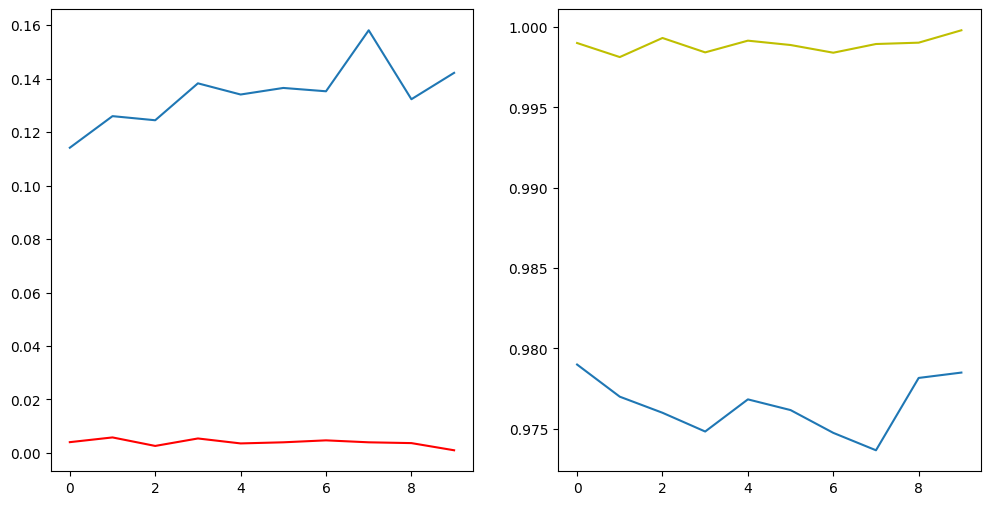

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],c='r')
plt.plot(hist.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],c='y')
plt.plot(hist.history['val_accuracy'])

In [25]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.1266170e-06, 9.9375486e-10, 3.2143176e-05, ..., 9.9924856e-01,
        1.6658881e-06, 5.3397587e-05],
       [7.7009885e-11, 1.4942907e-05, 9.9998367e-01, ..., 1.3836714e-15,
        1.1779078e-06, 2.1528977e-14],
       [1.3976811e-08, 9.9973363e-01, 6.6509841e-05, ..., 1.2111483e-04,
        7.6207602e-05, 1.7447286e-08],
       ...,
       [2.0527515e-15, 4.4321804e-15, 1.4676735e-15, ..., 2.6640782e-08,
        2.5459496e-11, 2.6482464e-08],
       [4.2336549e-15, 1.3856092e-18, 5.0110323e-21, ..., 1.1671851e-14,
        9.8486752e-10, 4.2627973e-13],
       [9.3755169e-12, 1.1784223e-16, 7.6882457e-14, ..., 1.0163194e-19,
        4.5224605e-15, 1.1201478e-15]], dtype=float32)

In [30]:
# to change this probability output into prediction
y_prd = y_prob.argmax(axis=1)
y_prd

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
# model = load_model('digit_model.h5')  # replace with your model filename

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define a region of interest (ROI) for drawing digit
    roi = frame[100:300, 100:300]
    cv2.rectangle(frame, (100,100), (350,350), (0,255,0), 2)

    # Preprocess ROI
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)

    # Predict digit
    pred = model.predict(reshaped)
    digit = np.argmax(pred)

    # Show prediction on screen
    cv2.putText(frame, f'Predicted: {digit}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX,
                1.5, (0, 0, 255), 3)

    # Display
    cv2.imshow('Digit Detector', frame)

    # Break on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━